In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [7]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]
    

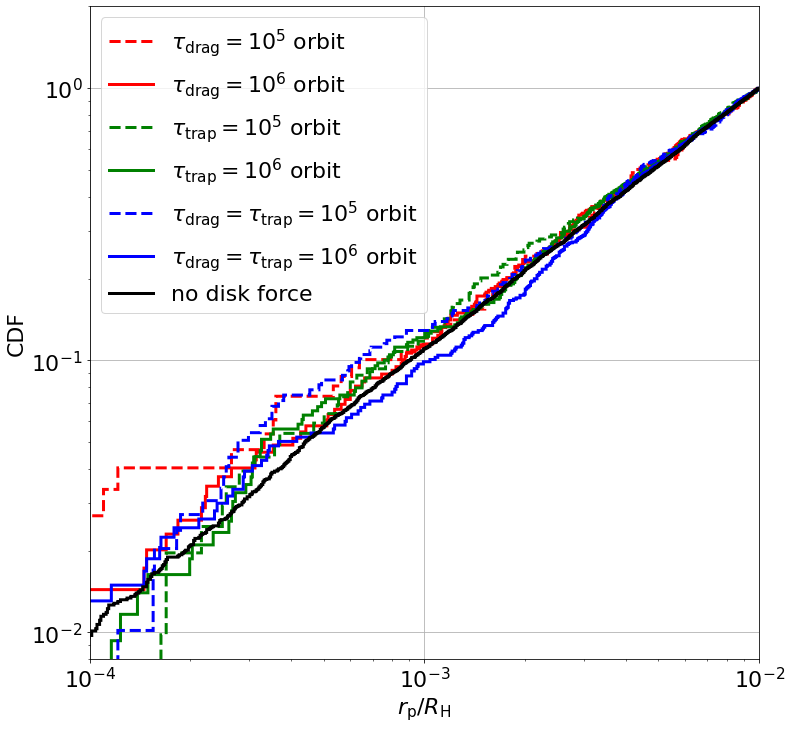

In [13]:
## 
##  Read the data 
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc(np.load('./data/can_CE0-2000.npy'),rc)

dd_t5 = limit_rc(np.load('./data/df_d5tx.npy'),rc)
dd_t6 = limit_rc(np.load('./data/df_d6tx.npy'),rc)

dt_t5 = limit_rc(np.load('./data/df_dxt5.npy'),rc)
dt_t6 = limit_rc(np.load('./data/df_dxt6.npy'),rc)

d_t5t5 = limit_rc(np.load('./data/df_d5t5.npy'),rc)
d_t6t6 = limit_rc(np.load('./data/df_d6t6.npy'),rc)





##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([1e-4,1e-2])
axs.set_ylim([0.8e-2,2])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-5,-1.1,1001)
aluse = .5
lw = 3



# plot the distribution of rp

eta = dd_t5[:,3] * (1-dd_t5[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='r',histtype='step',ls='--')

eta = dd_t6[:,3] * (1-dd_t6[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='r',histtype='step',ls='-')


eta = dt_t5[:,3] * (1-dt_t5[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='g',histtype='step',ls='--')

eta = dt_t6[:,3] * (1-dt_t6[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='g',histtype='step',ls='-')

eta = d_t5t5[:,3] * (1-d_t5t5[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='b',histtype='step',ls='--')

eta = d_t6t6[:,3] * (1-d_t6t6[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='b',histtype='step',ls='-')

eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='k',histtype='step')


# Legend
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^5$ orbit',color='r',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^6$ orbit',color='r',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^5$ orbit',color='g',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^6$ orbit',color='g',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^5$ orbit',color='b',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^6$ orbit',color='b',ls='-')
axs.plot([],[],lw=lw,label=r'no disk force',color='k',ls='-')



##  Save the figure
axs.legend(loc=2,ncol=1)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp-tau.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp-tau.png',bbox_inches='tight',transparent=True)
